In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:2px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

**<font size='6' color='red'>ch4.RNN(Recurrent Neural Network 순환신경망</font>**
# 1. 문맥을 이용하여 모델 만들기

In [2]:
text = """경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다"""
text1 = "장마철이 오고 있다"

In [3]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text, text1])
encoded = t.texts_to_sequences([text, text1])
print(encoded)
print(t.word_index)

[[3, 4, 1, 5, 2, 6, 1, 7, 8, 1, 9, 10, 1, 11], [12, 13, 2]]
{'말이': 1, '있다': 2, '경마장에': 3, '있는': 4, '뛰고': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11, '장마철이': 12, '오고': 13}


In [4]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences([text])
print(encoded)
print(t.word_index)

[[2, 3, 1, 4, 5, 6, 1, 7, 8, 1, 9, 10, 1, 11]]
{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [5]:
# 문자열 리스트를 인덱스 시퀀스로 변환
print(t.texts_to_sequences(['경마장에 말이 있다', '말이 뛴다']))
print(t.texts_to_sequences(['가는 말이 곱다'])[0])

[[2, 1, 5], [1]]
[8, 1, 11]


In [6]:
text = """경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다"""

In [7]:
for key, value in t.word_index.items():
    print(key, value)

말이 1
경마장에 2
있는 3
뛰고 4
있다 5
그의 6
법이다 7
가는 8
고와야 9
오는 10
곱다 11


In [8]:
# 학습을 시키기 위해 ['경마장에 있는','경마장에 있는 말이', ...]
sequences = []
for line in text.split('\n'):
    print('원문장 : ', line)
    encoded = t.texts_to_sequences([line])[0]
    print('encoded된 문장 : ', encoded)
    for i in range(0, len(encoded)-1):  # i : 시작index
        for j in range(i+2, len(encoded)+1): # j : 끝나는 index바로 뒤
            sequences.append(encoded[i:j])
print(sequences)
print('sequences와 해석 출력')
for sequence in sequences:
    for word_seq in sequence:
        for word, id in t.word_index.items():
            if word_seq == id:
                print('{}:{}'.format(word_seq, word), end=' ')
                break
    print()

원문장 :  경마장에 있는 말이 뛰고 있다
encoded된 문장 :  [2, 3, 1, 4, 5]
원문장 :  그의 말이 법이다
encoded된 문장 :  [6, 1, 7]
원문장 :  가는 말이 고와야 오는 말이 곱다
encoded된 문장 :  [8, 1, 9, 10, 1, 11]
[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [3, 1], [3, 1, 4], [3, 1, 4, 5], [1, 4], [1, 4, 5], [4, 5], [6, 1], [6, 1, 7], [1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11], [1, 9], [1, 9, 10], [1, 9, 10, 1], [1, 9, 10, 1, 11], [9, 10], [9, 10, 1], [9, 10, 1, 11], [10, 1], [10, 1, 11], [1, 11]]
sequences와 해석 출력
2:경마장에 3:있는 
2:경마장에 3:있는 1:말이 
2:경마장에 3:있는 1:말이 4:뛰고 
2:경마장에 3:있는 1:말이 4:뛰고 5:있다 
3:있는 1:말이 
3:있는 1:말이 4:뛰고 
3:있는 1:말이 4:뛰고 5:있다 
1:말이 4:뛰고 
1:말이 4:뛰고 5:있다 
4:뛰고 5:있다 
6:그의 1:말이 
6:그의 1:말이 7:법이다 
1:말이 7:법이다 
8:가는 1:말이 
8:가는 1:말이 9:고와야 
8:가는 1:말이 9:고와야 10:오는 
8:가는 1:말이 9:고와야 10:오는 1:말이 
8:가는 1:말이 9:고와야 10:오는 1:말이 11:곱다 
1:말이 9:고와야 
1:말이 9:고와야 10:오는 
1:말이 9:고와야 10:오는 1:말이 
1:말이 9:고와야 10:오는 1:말이 11:곱다 
9:고와야 10:오는 
9:고와야 10:오는 1:말이 
9:고와야 10:오는 1:말이 11:곱다 
10:오는 1:말이 
10:오는 1:말이 11:곱다 
1:

In [9]:
print([len(sequence) for sequence in sequences])
my_len = max(len(sequence) for sequence in sequences)
my_len

[2, 3, 4, 5, 2, 3, 4, 2, 3, 2, 2, 3, 2, 2, 3, 4, 5, 6, 2, 3, 4, 5, 2, 3, 4, 2, 3, 2]


6

In [10]:
# sequences를 훈련 가능하도록 모두 6개로 조정
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences=sequences,
                                maxlen=my_len,
                                #padding='post',
                                padding='pre')

padded_sequences.shape, type(padded_sequences)
#padded_sequences

((28, 6), numpy.ndarray)

In [11]:
# 독립변수(x)와 타켓변수(y)로 분리
X = padded_sequences[:,:-1]
y = padded_sequences[:, -1]
X,y

(array([[ 0,  0,  0,  0,  2],
        [ 0,  0,  0,  2,  3],
        [ 0,  0,  2,  3,  1],
        [ 0,  2,  3,  1,  4],
        [ 0,  0,  0,  0,  3],
        [ 0,  0,  0,  3,  1],
        [ 0,  0,  3,  1,  4],
        [ 0,  0,  0,  0,  1],
        [ 0,  0,  0,  1,  4],
        [ 0,  0,  0,  0,  4],
        [ 0,  0,  0,  0,  6],
        [ 0,  0,  0,  6,  1],
        [ 0,  0,  0,  0,  1],
        [ 0,  0,  0,  0,  8],
        [ 0,  0,  0,  8,  1],
        [ 0,  0,  8,  1,  9],
        [ 0,  8,  1,  9, 10],
        [ 8,  1,  9, 10,  1],
        [ 0,  0,  0,  0,  1],
        [ 0,  0,  0,  1,  9],
        [ 0,  0,  1,  9, 10],
        [ 0,  1,  9, 10,  1],
        [ 0,  0,  0,  0,  9],
        [ 0,  0,  0,  9, 10],
        [ 0,  0,  9, 10,  1],
        [ 0,  0,  0,  0, 10],
        [ 0,  0,  0, 10,  1],
        [ 0,  0,  0,  0,  1]]),
 array([ 3,  1,  4,  5,  1,  4,  5,  4,  5,  5,  1,  7,  7,  1,  9, 10,  1,
        11,  9, 10,  1, 11, 10,  1, 11,  1, 11, 11]))

In [12]:
# X를 엠베딩 작업할 때 필요한 입력 bit 수 (단어수 +1)
input_dim = len(t.word_index)+1
input_dim

12

In [13]:
# y의 원핫인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(y, input_dim)
X.shape,Y.shape, input_dim

((28, 5), (28, 12), 12)

In [14]:
%%time
# 2, 모델 생성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding # Xi의 원핫인코딩한 희소행렬 변환 
from tensorflow.keras.layers import SimpleRNN, Dense 
import matplotlib.pyplot as plt

model = Sequential()
model.add(Embedding(input_dim = input_dim,  # 12개로 원핫인코딩
                   output_dim = 10, # 임베딩 출력의 갯수
                   input_length=X.shape[1], # 입력(X)의 수
                   ))
model.add(SimpleRNN(units=32))
model.add(Dense(12, activation='softmax'))
print(model.summary())
# 3. 모델 학습 과정 설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
# 4. 모델 학습시키기
hist = model.fit(X, Y, epochs=300, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 10)             120       
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1376      
                                                                 
 dense (Dense)               (None, 12)                396       
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
1/1 - 1s - loss: 2.4635 - accuracy: 0.2143 - 952ms/epoch - 952ms/step
Epoch 2/300
1/1 - 0s - loss: 2.4527 - accuracy: 0.3214 - 4ms/epoch - 4ms/step
Epoch 3/300
1/1 - 0s - loss: 2.4418 - accuracy: 0.3929 - 5ms/epoch - 5ms/step
Epoch 4/300
1/1 - 0s - loss: 2.4306 - accuracy: 0.3929 - 3ms/epoch - 3ms/st

Epoch 95/300
1/1 - 0s - loss: 1.1553 - accuracy: 0.6786 - 4ms/epoch - 4ms/step
Epoch 96/300
1/1 - 0s - loss: 1.1450 - accuracy: 0.6786 - 3ms/epoch - 3ms/step
Epoch 97/300
1/1 - 0s - loss: 1.1349 - accuracy: 0.6786 - 4ms/epoch - 4ms/step
Epoch 98/300
1/1 - 0s - loss: 1.1249 - accuracy: 0.6786 - 3ms/epoch - 3ms/step
Epoch 99/300
1/1 - 0s - loss: 1.1151 - accuracy: 0.6786 - 4ms/epoch - 4ms/step
Epoch 100/300
1/1 - 0s - loss: 1.1054 - accuracy: 0.6786 - 5ms/epoch - 5ms/step
Epoch 101/300
1/1 - 0s - loss: 1.0958 - accuracy: 0.6786 - 3ms/epoch - 3ms/step
Epoch 102/300
1/1 - 0s - loss: 1.0863 - accuracy: 0.6786 - 4ms/epoch - 4ms/step
Epoch 103/300
1/1 - 0s - loss: 1.0769 - accuracy: 0.6786 - 4ms/epoch - 4ms/step
Epoch 104/300
1/1 - 0s - loss: 1.0677 - accuracy: 0.6786 - 4ms/epoch - 4ms/step
Epoch 105/300
1/1 - 0s - loss: 1.0585 - accuracy: 0.6786 - 5ms/epoch - 5ms/step
Epoch 106/300
1/1 - 0s - loss: 1.0494 - accuracy: 0.6786 - 4ms/epoch - 4ms/step
Epoch 107/300
1/1 - 0s - loss: 1.0405 - accur

Epoch 198/300
1/1 - 0s - loss: 0.4899 - accuracy: 0.8571 - 5ms/epoch - 5ms/step
Epoch 199/300
1/1 - 0s - loss: 0.4862 - accuracy: 0.8571 - 3ms/epoch - 3ms/step
Epoch 200/300
1/1 - 0s - loss: 0.4825 - accuracy: 0.8571 - 4ms/epoch - 4ms/step
Epoch 201/300
1/1 - 0s - loss: 0.4788 - accuracy: 0.8571 - 4ms/epoch - 4ms/step
Epoch 202/300
1/1 - 0s - loss: 0.4752 - accuracy: 0.8571 - 5ms/epoch - 5ms/step
Epoch 203/300
1/1 - 0s - loss: 0.4716 - accuracy: 0.8571 - 5ms/epoch - 5ms/step
Epoch 204/300
1/1 - 0s - loss: 0.4681 - accuracy: 0.8571 - 4ms/epoch - 4ms/step
Epoch 205/300
1/1 - 0s - loss: 0.4646 - accuracy: 0.8571 - 3ms/epoch - 3ms/step
Epoch 206/300
1/1 - 0s - loss: 0.4612 - accuracy: 0.8571 - 4ms/epoch - 4ms/step
Epoch 207/300
1/1 - 0s - loss: 0.4577 - accuracy: 0.8571 - 3ms/epoch - 3ms/step
Epoch 208/300
1/1 - 0s - loss: 0.4544 - accuracy: 0.8571 - 4ms/epoch - 4ms/step
Epoch 209/300
1/1 - 0s - loss: 0.4510 - accuracy: 0.8571 - 4ms/epoch - 4ms/step
Epoch 210/300
1/1 - 0s - loss: 0.4477 - 

CPU times: total: 5.2 s
Wall time: 3.79 s


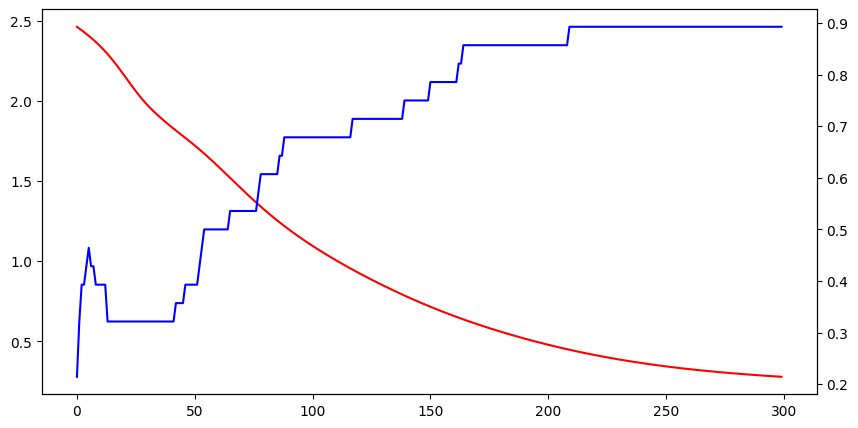

In [15]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r')
acc_ax = loss_ax.twinx() 
acc_ax.plot(hist.history.get('accuracy'), 'b')

In [25]:
# 모델 사용하기(경마장에 있는 말이 -> 뛰고)
encoded = t.texts_to_sequences(['경마장에 있는 말이'])[0]
input_data = pad_sequences([encoded], maxlen=my_len-1, padding='pre')
print('입력데이터 : ',input_data)
result = model.predict(input_data).argmax()
word = t.index_word.get(result, '??')
word = t.index_word[result]
print('예측된 단어 : ', word)

입력데이터 :  [[0 0 2 3 1]]
1/1 [==============================] - 0s 20ms/step
예측된 단어 :  뛰고


In [30]:
# 모델 사용하기(경마장에 있는 말이 -> 뛰고)
input_word = input('입력단어 : ')
encoded = t.texts_to_sequences([input_word])[0]
input_data = pad_sequences([encoded], maxlen=my_len-1, padding='pre')
print('입력데이터 : ',input_data)
result = model.predict(input_data, verbose=0).argmax()
word = t.index_word.get(result, '??')
word = t.index_word[result]
print('예측된 단어 : ', word)

입력단어 : 가는 말이
입력데이터 :  [[0 0 0 8 1]]
예측된 단어 :  고와야


In [26]:
t.texts_to_sequences(['없는 단어'])

[[]]

# 2. 다음 문맥 예측해 보기

In [48]:
# "경마장에" -> "있는" = "경마장에 있는" -> "말이" = "경마장에 있는 말이"
# "경마장에" 이후에 올 단어 ?개 예측 -> "경마장에 있는 말이 뛰고"
def sentence_generation(current_word, n):
    # print('입력된 단어 : ', current_word)
    for i in range(1, n+1):
        encoded = t.texts_to_sequences([current_word])[0]
        input_data = pad_sequences([encoded], maxlen=my_len-1, padding='pre')
        result = model.predict(input_data, verbose=0).argmax()
        word = t.index_word[result]
        current_word = current_word + ' ' + word
#         print('{}번째 생성 문맥 : {} ({}{})'.format(i,
#                                            current_word,
#                                            encoded,
#                                            result))
    return current_word
    
sentence_generation('경마장에', 4)

'경마장에 있는 말이 뛰고 있다'

In [47]:
sentence_generation('말이', 5)

'말이 고와야 오는 말이 곱다 법이다'